In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
import model.basic_model_lib

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')

In [5]:

ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
psizes = [150,120,200,120,350]
pmarkers = ['o', 's', '^', 'D', '*']

# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'


In [6]:
PRO_COLOR = 'MediumSeaGreen'
PRO_FL_COLOR = 'DarkGreen'
PRO_FCM_COLOR = 'MediumSpringGreen'

ALT_COLOR = 'Gold'
ALT_FCM_COLOR = 'PaleGoldenrod'
N_COLOR = 'royalblue'
ON_COLOR = 'PowderBlue'
C_COLOR = 'FireBrick'
OC_COLOR = 'LightCoral'

mcolors = {
    'b_n_p' : PRO_COLOR, 
    'b_c_p': PRO_COLOR, 
    'b_n_a': ALT_COLOR , 
    'b_c_a' : ALT_COLOR, 
    'x_p': PRO_COLOR, 
    'x_a': ALT_COLOR, 
    'n' : N_COLOR, 
    'c': C_COLOR, 
    'on': ON_COLOR, 
    'oc':OC_COLOR,
    'q_n_p' :PRO_COLOR, 
    'q_c_p': PRO_COLOR, 
}


In [7]:
from sympy import *

In [8]:
df = pd.read_pickle('CCPA.pkl.gz')
df.loc[df.PRO == 'C9B', 'PRO'] = 'MIT0604'

In [9]:
prevfcm_df = cp.get_prev_fcm_df()
fcmdf = cp.get_fcm_df()

In [10]:
fl2cell_model, compdf = cp.gen_FL2cells_model()
df['cells'] = cp.compute_FL2cells(df['FL'], fl2cell_model)

                            OLS Regression Results                            
Dep. Variable:                    FCM   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     776.5
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           2.49e-90
Time:                        12:52:37   Log-Likelihood:                -6527.3
No. Observations:                 347   AIC:                         1.306e+04
Df Residuals:                     345   BIC:                         1.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.769e+05   3.27e+06     -0.177      0.8

C:\Users\wosnat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample,cells
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A",4.105691e+06
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A",5.021082e+06
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A",4.880252e+06
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A",5.760436e+06
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A",2.167415e+07


In [12]:
tal_df = pd.read_excel(os.path.join('fcm_and_fl', 'sum_med4_1a3_cell count1.xlsx'), sheet_name='osnat')
tal_df

,day,sample,Med4 Axenic,1A3 Axenic,Med4 co_culture,1A3 co_culture,Med4 co_culture syber
0,0.000000,NaN,3.802745e+05,4.915572e+06,9.410456e+05,3.684665e+06,6.976242e+05
1,1.671528,1.0,3.009659e+05,3.117699e+07,2.282536e+06,7.125270e+06,1.855292e+06
2,1.671528,2.0,2.114896e+05,2.843527e+07,2.040044e+06,1.766739e+07,1.576674e+06
3,1.671528,3.0,2.661922e+06,1.772358e+07,1.850945e+06,1.788553e+07,1.203024e+06
4,3.677778,1.0,3.111337e+06,4.349969e+07,4.493882e+06,2.257883e+07,3.861771e+06
5,3.677778,2.0,3.548551e+06,2.244403e+07,4.280311e+06,3.869978e+07,NaN
6,3.677778,3.0,3.646162e+06,1.819387e+07,3.655172e+06,2.239309e+07,3.298056e+06
7,8.731250,1.0,3.144687e+07,1.799124e+07,5.610901e+07,1.304536e+07,5.056371e+07
8,8.731250,2.0,3.639451e+07,3.139962e+07,7.145495e+07,1.343844e+07,6.449892e+07
9,8.731250,3.0,4.333299e+07,1.300813e+07,7.339043e+07,2.474082e+07,6.521598e+07


In [13]:
tal_df.columns

Index(['day', 'sample', 'Med4 Axenic', '1A3 Axenic', 'Med4 co_culture',
       '1A3 co_culture', 'Med4 co_culture syber'],
      dtype='object')

In [14]:
sns.set_context('talk')

Text(0, 0.5, 'cells/ml')

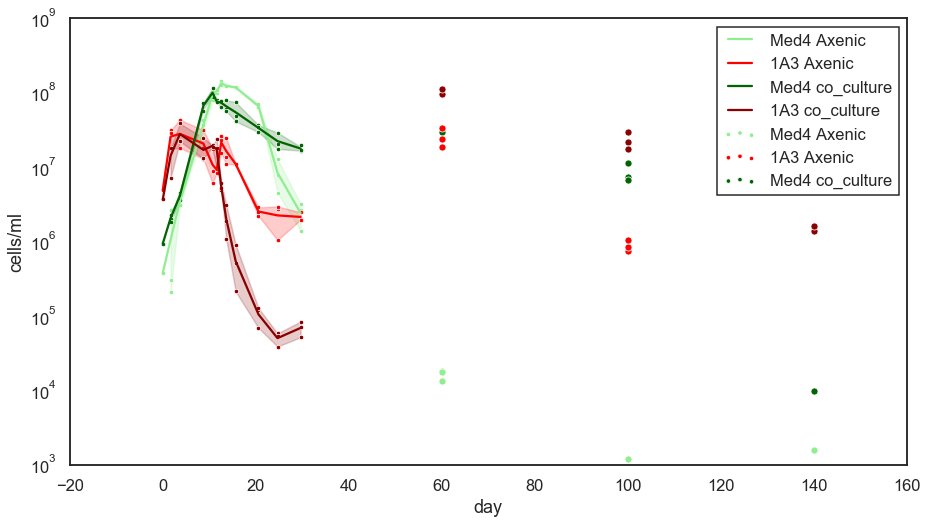

In [21]:
colors = {'Med4 Axenic' : 'lightgreen', 
          '1A3 Axenic' : 'red', 
          'Med4 co_culture' : 'darkgreen',
       '1A3 co_culture' : 'darkred'}
#sns.set_context('paper')
for i in ['Med4 Axenic', 
          '1A3 Axenic', 
          'Med4 co_culture',
       '1A3 co_culture', #'Med4 co_culture syber'
         ]:
    sns.lineplot(x=tal_df.day, y=tal_df[i], label=i,  color=colors[i])
    sns.scatterplot(x=tal_df.day, y=tal_df[i], label=i, s=20, color=colors[i], legend=False)
                
df_axenic1 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.culture.isin(['Axenic'])]
df_1a31 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.ALT.isin(['1A3'])]
prevdf_axenic1 = prevfcm_df.loc[prevfcm_df.METHOD.isin(['FL']) & prevfcm_df.PRO.isin(['MED4']) 
                               & prevfcm_df.MODE.isin(['lowN'])]
prevdf_1a31 = prevfcm_df.loc[prevfcm_df.METHOD.isin(['FL']) & prevfcm_df.PRO.isin(['MED4']) 
                               & prevfcm_df.MODE.isin(['1A3'])]

compdf_axenic = compdf.loc[compdf.MODE.isin(['lowN']) & compdf.PRO.isin(['MED4']) ]
compdf_1a3 = compdf.loc[compdf.MODE.isin(['1A3']) & compdf.PRO.isin(['MED4']) ]
fcmdf_axenic1 = fcmdf.loc[fcmdf.experiment.isin(['exp1']) & fcmdf.PRO.isin(['MED4']) & fcmdf.ALT.isna()]
fcmdf_1a31 = fcmdf.loc[fcmdf.experiment.isin(['exp1']) & fcmdf.PRO.isna() & fcmdf.ALT.isin(['1A3'])]
fcmdf_coculture1 = fcmdf.loc[fcmdf.experiment.isin(['exp1']) & fcmdf.PRO.isin(['MED4']) & fcmdf.ALT.isin(['1A3'])]

#sns.lineplot(x=prevdf_1a31.day, y=cp.compute_FL2cells(prevdf_1a31['VALUE'], fl2cell_model),label='Tal FL 1A3',color='darkblue')
#sns.lineplot(x=prevdf_axenic1.day, y=cp.compute_FL2cells(prevdf_axenic1['VALUE'], fl2cell_model),label='Tal FL Axenic',color='lightblue')

#sns.lineplot(x=df_axenic1.day, y=df_axenic1.cells,label='FL axenic')
#sns.lineplot(x=df_1a31.day, y=df_1a31.cells,label='FL 1A3')
sns.scatterplot(x=fcmdf_axenic1.day, y=fcmdf_axenic1['PRO.1'],label='FCM MED4 axenic', color='lightgreen',s=50, legend=False)
sns.scatterplot(x=fcmdf_coculture1.day, y=fcmdf_coculture1['PRO.1'],label='FCM MED4 coculture', color='darkgreen', s=50, legend=False)
sns.scatterplot(x=fcmdf_coculture1.day, y=fcmdf_coculture1['ALT.1'],label='FCM 1A3 coculture', color='darkred', s=50, legend=False)
sns.scatterplot(x=fcmdf_1a31.day, y=fcmdf_1a31['ALT.1'],label='FCM 1A3 axenic', color='red', s=50, legend=False)
plt.yscale('log')
plt.ylim(1e3,1e9)
plt.ylabel('cells/ml')


Text(0, 0.5, 'FL')

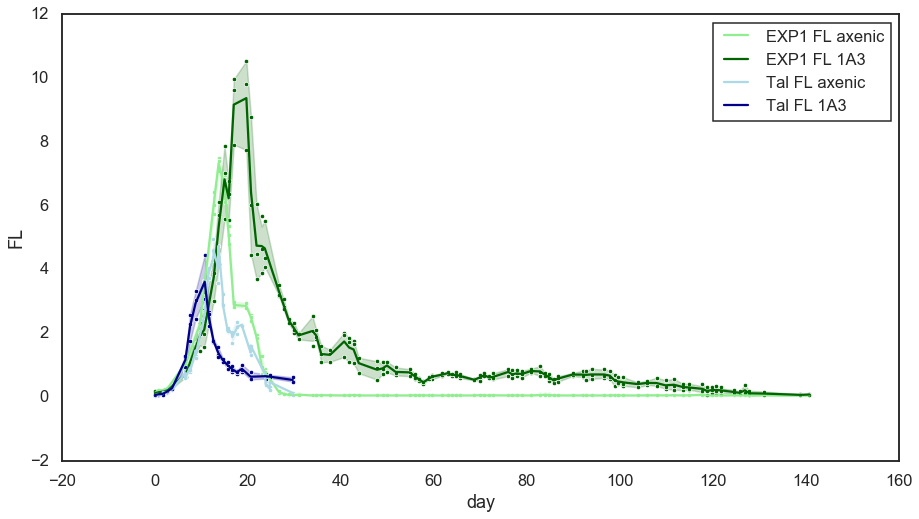

In [16]:
df_axenic1 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.culture.isin(['Axenic'])]
df_1a31 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.ALT.isin(['1A3'])]
prevdf_axenic1 = prevfcm_df.loc[prevfcm_df.METHOD.isin(['FL']) & prevfcm_df.PRO.isin(['MED4']) 
                               & prevfcm_df.MODE.isin(['lowN'])]
prevdf_1a31 = prevfcm_df.loc[prevfcm_df.METHOD.isin(['FL']) & prevfcm_df.PRO.isin(['MED4']) 
                               & prevfcm_df.MODE.isin(['1A3'])]

sns.lineplot(x=df_axenic1.day, y=df_axenic1.FL,label='EXP1 FL axenic', color=colors['Med4 Axenic'])
sns.lineplot(x=df_1a31.day, y=df_1a31.FL,label='EXP1 FL 1A3', color=colors['Med4 co_culture'])
#plt.show()
sns.lineplot(x=prevdf_axenic1.day, y=prevdf_axenic1.VALUE,label='Tal FL axenic', color='lightblue')
sns.lineplot(x=prevdf_1a31.day, y=prevdf_1a31.VALUE,label='Tal FL 1A3',color='darkblue')
sns.scatterplot(x=df_axenic1.day, y=df_axenic1.FL,label='EXP1 FL axenic', color=colors['Med4 Axenic'], legend=False)
sns.scatterplot(x=df_1a31.day, y=df_1a31.FL,label='EXP1 FL 1A3', color=colors['Med4 co_culture'], legend=False)
sns.scatterplot(x=prevdf_axenic1.day, y=prevdf_axenic1.VALUE,label='Tal FL axenic', color='lightblue', legend=False)
sns.scatterplot(x=prevdf_1a31.day, y=prevdf_1a31.VALUE,label='Tal FL 1A3',color='darkblue', legend=False)
plt.ylabel('FL')


# colors = {'Med4 Axenic' : 'lightgreen', 
#           '1A3 Axenic' : 'red', 
#           'Med4 co_culture' : 'darkgreen',
#        '1A3 co_culture' : 'darkred

In [17]:
df1 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.culture.isin(['Axenic'])]
fcmdf1 = fcmdf.loc[fcmdf.experiment.isin(['exp1']) & 
                   fcmdf.PRO.isin(['MED4']) & 
                  fcmdf.ALT.isna()]

compdf1 = compdf.loc[compdf.MODE.isin(['lowN']) & 
                   compdf.PRO.isin(['MED4']) ]
compdf1.rename(columns={'FCM': 'PRO.1'}, inplace=True)
reffcmdf1 = pd.concat([fcmdf1.loc[:,['day', 'PRO.1']], compdf1.loc[:,['day', 'PRO.1']], ])

C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
